# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.01, 0.001]
OPTIMIZER = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    for opt in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %.6f + OPT = %s" % (lr, opt))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if opt == 'SGD':
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        elif opt == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif opt == 'AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        elif opt == 'Adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s-opt-%s" % (str(lr), opt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.010000 + OPT = SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 22ms/step -

196/196 [==============================] - 4s 21ms/step - loss: 0.3851 - accuracy: 0.8612 - val_loss: 2.3471 - val_accuracy: 0.5188
Experiment with lr = 0.010000 + OPT = RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 

196/196 [==============================] - 6s 32ms/step - loss: 1.7686 - accuracy: 0.3538 - val_loss: 1.9989 - val_accuracy: 0.3049
Epoch 50/50
196/196 [==============================] - 6s 29ms/step - loss: 1.7657 - accuracy: 0.3570 - val_loss: 1.7697 - val_accuracy: 0.3486
Experiment with lr = 0.010000 + OPT = AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________________________

196/196 [==============================] - 4s 21ms/step - loss: 1.0437 - accuracy: 0.6356 - val_loss: 1.4464 - val_accuracy: 0.5042
Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0378 - accuracy: 0.6397 - val_loss: 1.5396 - val_accuracy: 0.4784
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0270 - accuracy: 0.6442 - val_loss: 1.5751 - val_accuracy: 0.4645
Experiment with lr = 0.010000 + OPT = Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

196/196 [==============================] - 5s 28ms/step - loss: 1.5143 - accuracy: 0.4581 - val_loss: 1.5807 - val_accuracy: 0.4416
Epoch 48/50
196/196 [==============================] - 5s 26ms/step - loss: 1.5103 - accuracy: 0.4591 - val_loss: 1.6101 - val_accuracy: 0.4232
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5232 - accuracy: 0.4574 - val_loss: 1.5873 - val_accuracy: 0.4318
Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5212 - accuracy: 0.4533 - val_loss: 1.5889 - val_accuracy: 0.4313
Experiment with lr = 0.001000 + OPT = SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__________________________________________

196/196 [==============================] - 4s 19ms/step - loss: 0.9271 - accuracy: 0.6720 - val_loss: 1.3632 - val_accuracy: 0.5378
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9176 - accuracy: 0.6787 - val_loss: 1.4151 - val_accuracy: 0.5289
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9082 - accuracy: 0.6813 - val_loss: 1.5022 - val_accuracy: 0.5063
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8907 - accuracy: 0.6858 - val_loss: 1.4156 - val_accuracy: 0.5278
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 0.8842 - accuracy: 0.6902 - val_loss: 1.3536 - val_accuracy: 0.5383
Experiment with lr = 0.001000 + OPT = RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________

196/196 [==============================] - 7s 33ms/step - loss: 0.8592 - accuracy: 0.6894 - val_loss: 1.8574 - val_accuracy: 0.4729
Epoch 46/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8453 - accuracy: 0.6981 - val_loss: 1.7727 - val_accuracy: 0.4768
Epoch 47/50
196/196 [==============================] - 6s 29ms/step - loss: 0.8357 - accuracy: 0.6987 - val_loss: 1.8187 - val_accuracy: 0.4819
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 0.8271 - accuracy: 0.7030 - val_loss: 1.9075 - val_accuracy: 0.4868
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 0.8107 - accuracy: 0.7095 - val_loss: 2.1102 - val_accuracy: 0.4755
Epoch 50/50
196/196 [==============================] - 6s 28ms/step - loss: 0.8015 - accuracy: 0.7100 - val_loss: 1.8865 - val_accuracy: 0.4946
Experiment with lr = 0.001000 + OPT = AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (type)  

196/196 [==============================] - 3s 17ms/step - loss: 1.5477 - accuracy: 0.4622 - val_loss: 1.5727 - val_accuracy: 0.4440
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5434 - accuracy: 0.4641 - val_loss: 1.5595 - val_accuracy: 0.4516
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5394 - accuracy: 0.4661 - val_loss: 1.5591 - val_accuracy: 0.4515
Epoch 47/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5348 - accuracy: 0.4664 - val_loss: 1.5739 - val_accuracy: 0.4480
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5313 - accuracy: 0.4684 - val_loss: 1.5581 - val_accuracy: 0.4503
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5275 - accuracy: 0.4690 - val_loss: 1.5525 - val_accuracy: 0.4524
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5237 - accuracy: 0.4697 - val_loss: 1.5571 - val_accuracy: 0.4523
Expe

196/196 [==============================] - 4s 19ms/step - loss: 0.7620 - accuracy: 0.7261 - val_loss: 1.5991 - val_accuracy: 0.5199
Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 0.7342 - accuracy: 0.7374 - val_loss: 1.6145 - val_accuracy: 0.5234
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7270 - accuracy: 0.7388 - val_loss: 1.6394 - val_accuracy: 0.5227
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7007 - accuracy: 0.7507 - val_loss: 1.7027 - val_accuracy: 0.5162
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 0.6841 - accuracy: 0.7558 - val_loss: 1.7348 - val_accuracy: 0.5192
Epoch 48/50
196/196 [==============================] - 4s 19ms/step - loss: 0.6815 - accuracy: 0.7550 - val_loss: 1.6996 - val_accuracy: 0.5197
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 0.6652 - accuracy: 0.7625 - val_loss: 1.7598 - val_accuracy: 0.5158
Epoc

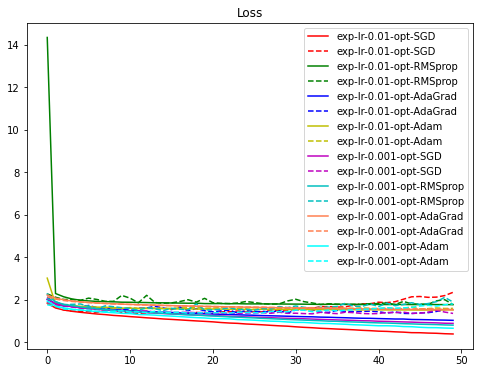

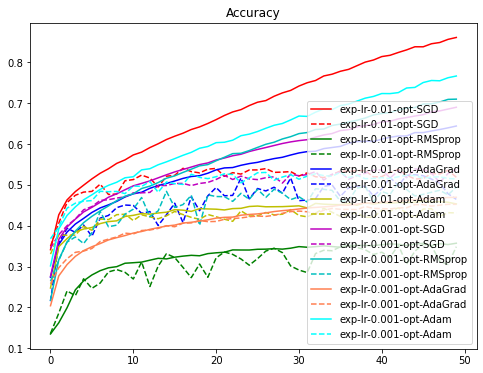

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "c", "coral", "aqua"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()